In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 载入训练数据
train_image = np.load('../ML-design/processed_data/train_img.npy')
train_label = np.load('../ML-design/processed_data/train_label2.npy')

# 载入测试数据
test_image = np.load('../ML-design/processed_data/test_img.npy')
test_label = np.load('../ML-design/processed_data/test_label.npy')

In [16]:
label_dict={0: '96023-Ricefine米立方系列',1: '87016-上臣巴西松子系列', 2: '95029-中宝果干系列', 3: '96017-乐事系列', 4: '98030-优可麦系列', 5: '96040-俊辉系列', 6: '95045-健康香酥脆枣系列', 7: '98061-凯吉托娜蛋糕系列', 8: '98042-卡尔顿系列', 9: '97050-友臣系列', 10: '93008-双鱼特级猪肉脯系列', 11: '96014-可拉奥薯条系列', 12: '98039-可米兔系列', 13: '98073-叶奇灵面包系列', 14: '87058-听鸿碧根果仁系列', 15: '96020-咪咪虾条系列', 16: '95013-囍桂子栗子系列', 17: '98006-回头客卡侬尼华夫饼系列', 18: '95007-大綦甘栗仁系列', 19: '97085-奇百味核桃糕系列', 20: '88001-奥赛山楂系列', 21: '87029-好迪南瓜子手剥香瓜子系列', 22: '87010-好迪小包牙签瓜子系列', 23: '87049-好迪独立袋开心果系列', 24: '87030-姚生记山核桃仁系列', 25: '87040-姚生记紫衣腰果系列', 26: '87037-姚生记蛋壳小核桃系列', 27: '88009-姚芝堂系列', 28: '88006-宏泰记系列', 29: '88010-寻真山楂小包系列', 30: '96032-小王子萌主战酱系列', 31: '96028-小笨牛系列', 32: '98084-小薇家作十里桃香米糕系列', 33: '96013-尖角脆-达贝卡系列', 34: '87022-山上水中炒芝麻系列', 35: '96045-布特王子薯脆系列', 36: '96005-常记掌心脆系列', 37: '97006-康泉千层酥面包系列', 38: '96035-张先生拉面丸子系列', 39: '87004-徽相印瓜蒌籽系列', 40: '95011-思宏香酥脆枣系列', 41: '96049-旺旺开心黑白配系列', 42: '96026-旺旺米雪饼仙贝系列', 43: '95046-欧小胖小包果蔬脆系列', 44: '95052-欧小胖小包泰国菠萝蜜干系列', 45: '98003-欧米嘉3+2面包系列', 46: '87059-正泓奶枣扁桃仁系列', 47: '95009-海丽天草莓干系列', 48: '98031-海之最蛋糕系列', 49: '98070-满格华夫系列', 50: '96038-潘氏兄弟系列', 51: '87014-炒坚强香瓜子系列', 52: '00056-焙小七系列', 53: '97071-焙小七蛋糕系列', 54: '97003-爱乡亲手撕面包肉松饼系列', 55: '95044-百年树小包即食桂圆肉系列', 56: '95016-硬核潮仁小核桂圆干系列', 57: '87032-硬核潮仁巴旦木系列', 58: '87050-硬核潮仁开口松子系列', 59: '95027-硬核潮仁新疆枣系列', 60: '95020-硬核潮仁枸杞系列', 61: '87038-硬核潮仁碧根果系列', 62: '95018-硬核潮仁草莓果干系列', 63: '95015-硬核潮仁葡萄干系列', 64: '95017-硬核潮仁黄白桃果干系列', 65: '97043-立回味铜锣烧系列', 66: '98054-笑果十足系列', 67: '96037-米跳熊系列', 68: '97048-绿色趣味多烤芙条系列', 69: '95006-脆马蹄系列', 70: '88003-膨升升山楂系列', 71: '98002-艾德堡系列', 72: '98037-艾思利系列', 73: '87023-苏太太醉花生系列', 74: '95008-菇甜葵果蔬干系列', 75: '96043-辈儿香系列', 76: '97024-达利园糕点系列', 77: '87018-酥香阁瓜子仁系列', 78: '87052-锦隆夏威夷果小袋系列', 79: '87054-锦隆开口松子小袋系列', 80: '87045-锦隆混合果仁系列', 81: '87046-锦隆紫衣腰果系列', 82: '87041-阿宽瓜子系列', 83: '95005-阿弟仔金枕头榴莲干系列', 84: '87056-阿里山话梅西瓜子平角包系列', 85: '87013-非尝食尚枣夹核桃系列', 86: '88005-颜派爽口梅系列', 87: '97049-鲁旺人家欧培拉蛋卷系列', 88: '95030-鲜引力即食柠檬片系列', 89: '95031-鲜引力桑葚果干系列', 90: '95032-鲜引力樱桃果干系列', 91: '95033-鲜引力黄桃果干系列', 92: '87003-鲜淘蚕豆系列'}

In [4]:
# 数据归一化
train_image = tf.keras.utils.normalize(train_image, axis=1)
test_image = tf.keras.utils.normalize(test_image, axis=1)

In [5]:
# 标签序列化
train_label = list(train_label)
train_label_lst = []
for label in train_label:
    label = int(label)
    train_label_lst.append(label)   
train_label = tf.convert_to_tensor(train_label_lst)
train_label = tf.cast(train_label, tf.int64)


test_label = list(test_label)
test_label_lst = []
for label in test_label:
    label = int(label)
    test_label_lst.append(label)
test_label = tf.convert_to_tensor(test_label_lst)
test_label = tf.cast(test_label, tf.int64)

In [23]:
# 建立模型
model = tf.keras.Sequential()

# conv layer
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(70, 90, 3)))

# MaxPooling layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flaaten layer 平化层
model.add(tf.keras.layers.Flatten())

# 全连接层
model.add(tf.keras.layers.Dense(64, activation='relu'))


# 输出层
model.add(tf.keras.layers.Dense(93, activation='softmax'))


# 模型编译
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
)

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 68, 88, 128)       3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 44, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 191488)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                12255296  
_________________________________________________________________
dense_7 (Dense)              (None, 93)                6045      
Total params: 12,264,925
Trainable params: 12,264,925
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(train_image, train_label,
                    epochs=5,
                    validation_data=(test_image, test_label)
)

Epoch 1/5
413/413 [==============================] - 80s 193ms/step - loss: 3.1688 - accuracy: 0.2686 - val_loss: 2.9173 - val_accuracy: 0.3072
Epoch 2/5
413/413 [==============================] - 79s 191ms/step - loss: 1.5890 - accuracy: 0.5746 - val_loss: 1.7368 - val_accuracy: 0.4949
Epoch 3/5
413/413 [==============================] - 79s 190ms/step - loss: 0.9162 - accuracy: 0.7384 - val_loss: 1.3817 - val_accuracy: 0.5904
Epoch 4/5
413/413 [==============================] - 81s 195ms/step - loss: 0.5480 - accuracy: 0.8474 - val_loss: 1.1248 - val_accuracy: 0.6689
Epoch 5/5
413/413 [==============================] - 79s 190ms/step - loss: 0.3395 - accuracy: 0.9073 - val_loss: 1.0754 - val_accuracy: 0.6894


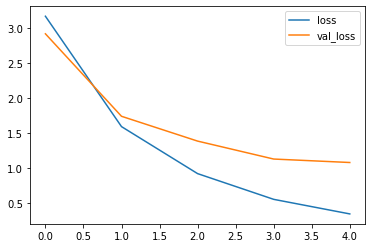

In [26]:
# 通过绘图来比较训练集loss和测试集loss随训练轮数的变化， 观察是否发生过拟合
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

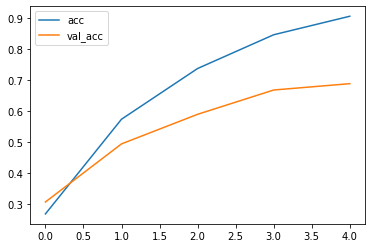

In [27]:
# 绘制准确率与训练轮数之间的关系
plt.plot(history.epoch, history.history.get('accuracy'), label='acc')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_acc')
plt.legend()

In [28]:
# 模型评估
model.evaluate(test_image, test_label)

10/10 [==============================] - 0s 34ms/step - loss: 1.0754 - accuracy: 0.6894


[1.0753722190856934, 0.6894198060035706]

In [32]:
# 对测试集图片的预测
predict = model.predict(test_image)

predict[0]

array([6.95812404e-01, 5.04382305e-21, 2.55807044e-17, 1.47424398e-05,
       7.70749584e-16, 2.98986048e-01, 1.89414298e-08, 1.37262214e-14,
       4.32818069e-06, 3.08901321e-10, 2.03410500e-11, 1.54609001e-08,
       6.15833339e-14, 8.09046219e-16, 1.11687114e-21, 1.76670786e-03,
       9.15813606e-12, 1.92391854e-17, 5.37784053e-11, 1.51708281e-08,
       1.25509084e-20, 2.45231666e-15, 2.00096292e-06, 1.70230965e-11,
       3.08325240e-20, 8.75542924e-14, 4.74036060e-16, 9.08221794e-13,
       2.28082744e-12, 2.70732825e-10, 5.95784327e-13, 6.01227162e-04,
       2.19138162e-11, 1.14978140e-11, 2.44751314e-15, 4.67264783e-07,
       7.85224046e-08, 2.39932074e-09, 4.12116918e-08, 5.08080630e-05,
       9.15211053e-16, 9.99891654e-07, 6.03822343e-07, 1.51378750e-08,
       4.96905113e-06, 3.52549222e-07, 2.20403627e-15, 2.62430081e-06,
       2.09477347e-09, 2.40156605e-15, 2.72318418e-03, 1.88744571e-12,
       3.26944324e-22, 1.05919022e-14, 5.72524466e-20, 6.92675896e-26,
      

In [33]:
# 取最大值索引
np.argmax(predict[0])

0

In [36]:
label_dict[0]

'96023-Ricefine米立方系列'